Replicate https://stats.stackexchange.com/questions/190148/autoencoder-pca-tensorflow?rq=1

but using "keras with tensorflow backend" instead of tensorflow directly

## Import libraries

In [1]:
print("load libraries")
import numpy as np
from sklearn.decomposition import PCA
import utils

# https://stackoverflow.com/a/34306306/4126114
np.random.seed(0)

load libraries


Using TensorFlow backend.


## Generate data

X [[  5.48813504e-01   7.15189366e-01   3.65816378e-01   2.61627984e-01
    8.45505553e-02   6.45894113e-01]
 [  4.37587211e-01   8.91773001e-01   7.09190581e-01   6.32437012e-01
    6.66350154e-02   5.28894920e-01]
 [  5.68044561e-01   9.25596638e-01   7.92985609e-01   7.33984814e-01
    1.57032938e-01   8.32619846e-01]
 [  7.78156751e-01   8.70012148e-01   6.58530585e-01   5.72929609e-01
    3.56657945e-01   7.80529176e-01]
 [  1.18274426e-01   6.39921021e-01   2.62046963e-01   1.67689360e-01
    6.77524960e-04   4.14661940e-01]
 [  2.64555612e-01   7.74233689e-01   4.64104944e-01   3.59325683e-01
    1.10992866e-02   6.17635497e-01]
 [  6.12095723e-01   6.16933997e-01   2.34809741e-01   1.44862112e-01
    8.72841608e-02   4.37031954e-01]
 [  6.97631196e-01   6.02254716e-02   2.18444256e-04   1.31559083e-05
    1.23151044e-03   1.28926298e-01]
 [  3.15428351e-01   3.63710771e-01   4.81136702e-02   1.74994601e-02
    4.15159042e-03   1.02044811e-01]
 [  2.08876756e-01   1.61309518e-01

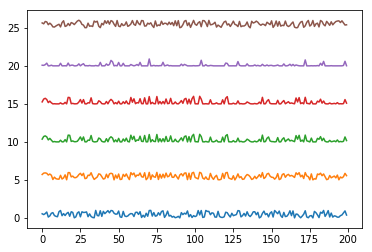

In [2]:
N=100000

# Try dataset from https://stats.stackexchange.com/questions/190148/autoencoder-pca-tensorflow?rq=1
from sklearn.preprocessing import scale
def data1(n_samples:int=2000, n_features:int=5):
    # n_samples, n_features = 2000, 5
    X = np.random.uniform(0, 1, (n_samples, n_features))
    X[:, 2] = X[:, 1]**3
    X[:, 3] = X[:, 1]*X[:, 2]
    X[:, 4] = X[:,1]**2 * X[:, 0]**3
    # auto-encoders need [0-1] range data
    # If PCA input is (mean=0,std=1) and AE is [0-1], MSE is incomparable
    # X = scale(X)
    return X

X = data1(N,6)

print('X',X[0:10,:])

utils.myPlot(X)

## PCA / AE with successive dimensionality reductions

PCA
n_components =  1
err pca =  0.388522379104
autoencoder


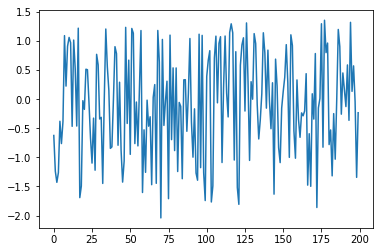

AE mse =  0.377331840682
PCA
n_components =  2
err pca =  0.283154708483
autoencoder


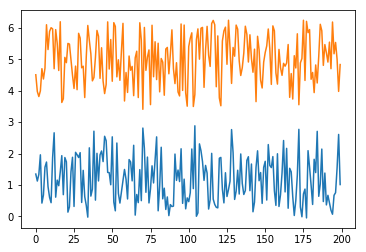

AE mse =  0.258869474298
PCA
n_components =  3
err pca =  0.123147407619
autoencoder


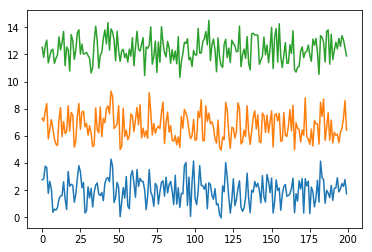

AE mse =  0.0532657582652
PCA
n_components =  4
err pca =  0.0772074026131
autoencoder


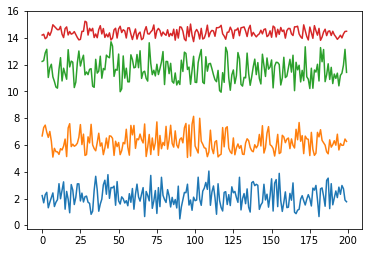

AE mse =  0.0514137957562
PCA
n_components =  5
err pca =  0.00944732211112
autoencoder


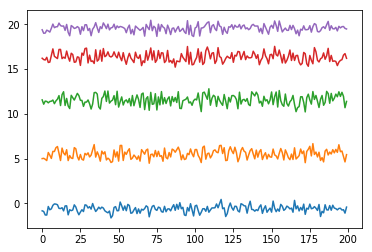

AE mse =  0.0502219174216
PCA
n_components =  6
err pca =  9.01991169833e-15
Explained variance ratio (cumsum) [ 0.54268743  0.75709937  0.9540557   0.98194078  0.99972961  1.        ]


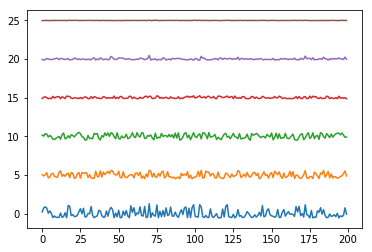

autoencoder


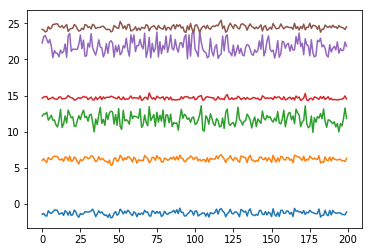

AE mse =  0.0507770482159


In [3]:
X_pca = []
X_pca.append(None) # so that the index starts at 1
N_epochs = 25
for n_c_i in [x+1 for x in range(X.shape[1])]: # 'mle'
    print("PCA")
    pca = PCA(n_components=n_c_i, random_state=888, svd_solver = 'full')
    X_pca.append(pca.fit_transform(X))
    # print("X_pca_0",X_pca_0[0:10,:])
    # print("")
    # print("Explained variance ratio (cumsum)", np.cumsum(pca.explained_variance_ratio_))
    # print("")
    print("n_components = ",n_c_i)
    utils.pca_err(X, X_pca[n_c_i])
    if n_c_i == X.shape[1]:
        print("Explained variance ratio (cumsum)", np.cumsum(pca.explained_variance_ratio_))
        # plot
        utils.myPlot(X_pca[n_c_i])
        
    # train autoencoder
    print("autoencoder")
    autoencoder, encoder = utils.buildNetwork(X.shape[1], encoding_dim_ae = n_c_i)
    utils.ae_fit_encode_plot_mse(X, autoencoder, encoder, N_epochs, verbose=0)

## Try AE7, AE10, AE15, AE20, AE25

autoencoder
n_components =  7


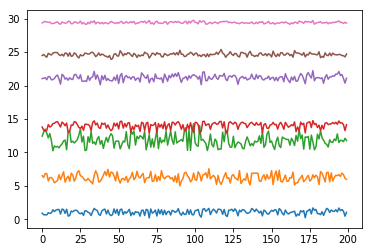

AE mse =  0.0508857667045
n_components =  10


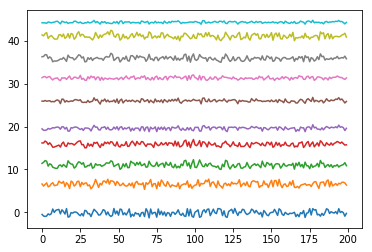

AE mse =  0.0463353120233
n_components =  15


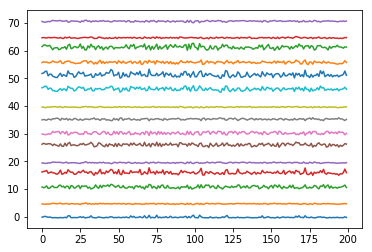

AE mse =  0.0414238863003
n_components =  20


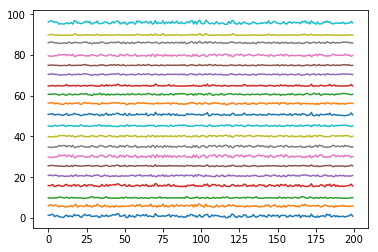

AE mse =  0.0291842591833
n_components =  25


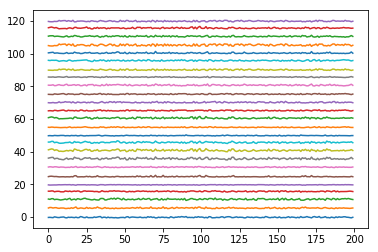

AE mse =  0.0323352726097


In [3]:
print("autoencoder")
N_epochs = 25
for n_c_i in [7,10,15,20,25]: # 'mle'
    print("n_components = ",n_c_i)
    autoencoder, encoder = utils.buildNetwork(X.shape[1], encoding_dim_ae = n_c_i)
    utils.ae_fit_encode_plot_mse(X, autoencoder, encoder, N_epochs, verbose=0)